## Exercise Interpolation

In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

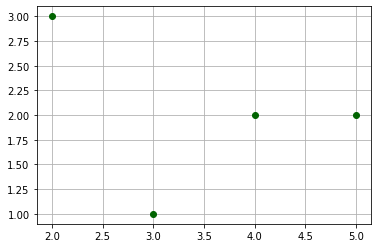

In [3]:
xs = [2,3,4,5]
ys = [3,1,2,2]
plt.plot(xs, ys, color='darkgreen', linestyle='none', marker='o')
plt.grid()

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

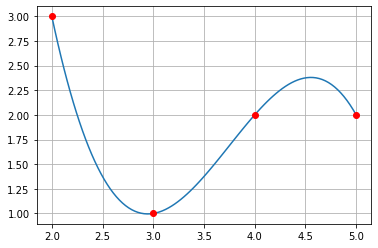

In [4]:
x = np.linspace(2,5,100)
y = -(4*x**3 - 45*x**2 + 161*x - 192)/6

plt.plot(x, y)
plt.plot(xs, ys, color='red', linestyle='none', marker='o')
plt.grid()

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

4) Write a function `ledendre(x)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5)`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

In [5]:
def make_w(i, xs):
    this_x = xs[i]
    the_rest = [x for j, x in enumerate(xs) if i != j]
    denom = np.prod([this_x - x_rest for x_rest in the_rest])
    def w(x):
        return np.prod([x - x_rest for x_rest in the_rest])/denom
    return w

def make_legendre(xs, ys):
    ws = [make_w(i, xs) for i,x in enumerate(xs)]
    def legendre(x):
        return sum(w(x)*y for w, y in zip(ws, ys))
    return legendre

leg = make_legendre(xs, ys)
leg(5)

2.0

In [6]:
def make_adder(offset):
    def adder(x):
        return x + offset
    return adder

five_adder = make_adder(5)
five_adder

<function __main__.make_adder.<locals>.adder(x)>

In [7]:
make_adder(5)(2)

7

In [8]:
five_adder(10)

15

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

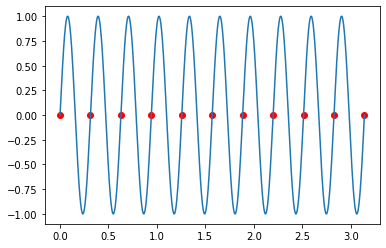

In [9]:
xs = np.linspace(0, math.pi, 11)
ys = np.sin(20*xs)
plt.plot(xs, ys, 'or')
xxs = np.linspace(0, math.pi, 1000)
yys = np.sin(20*xxs)
plt.plot(xxs, yys)

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

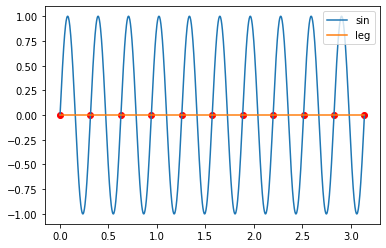

In [10]:
leg = make_legendre(xs, ys)
xxs = np.linspace(0, math.pi, 1000)
yys = np.sin(20*xxs)
y_leg = [leg(x) for x in xxs]
plt.plot(xs, ys, 'or')
plt.plot(xxs, yys, label='sin')
plt.plot(xxs, y_leg, label='leg')
plt.legend()

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(200*x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

8) Does it pass through all the point? Does it look like the original function?

## Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

In [46]:
from scipy.integrate import quad
def f(x):
    return x**3

quad(f, 1, 3)

(20.0, 2.220446049250313e-13)

In [44]:
def trapezoid(f, a, b, n):
    h = (b-a)/n
    return (h/2)*(f(a) + 2*sum(f(a+i*h) for i in range(1, n)) + f(b))

def func(x):
    return x**3


28.0
20.0008


1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [48]:
print(trapezoid(func, 1, 3, 1))

28.0


2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

In [47]:
print(trapezoid(func, 1, 3, 100))

20.0008


3) What is the bound on error for 1)?

In [50]:
# 3**4/4 - 1/4

# Bound error: (((b-a)**3)/(12*n**2))* f''($) where $ is the range [1,3]
# in range [1,3], 3 is chosen as it increases in a large amount

# (((3-1)**3)/(12*n**2))*(6*3) # n=1
    
(((3-1)**3)/(12*1**2))*(6*3)

12.0

4) What is the bound on error for 2)?

In [51]:
# (((3-1)**3)/(12*n**2))*(6*3) # n=100

(((3-1)**3)/(12*100**2))*(6*3)

0.0012000000000000001

5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those integral you can't do by hands. 

In [52]:
def f(x):
    return np.exp(-x)*np.sin(x**2)

trapezoid(f, 0, 1, 100)

0.1509133002686727

6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

In [56]:
def f(x):
    return np.exp(-x)

# 1/n**2 = 1/10**6

trapezoid(f, 0, 1, 1000) # n =1000

0.6321206115052712

7) Compute the integral above and make sure your answer is at most $10^{-6}$ away from the real answer. 

In [57]:
trapezoid(f, 0, 1, 1000)

0.6321206115052712